# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
 pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/6d/bc/6f79da3a8edf5f432ccdc49fd35e8b4fe2ce1d4ad3b5360c742101a57838/scipy-1.11.3-cp310-cp310-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 5.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'citipy'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key
city_url = url + "&q=" + "london"
#city_url = f"{url}lat={lats}&lon={lngs}&appid={weather_api_key}"
response = requests.get(city_url)
city_weather = response.json()
city_weather


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 4.32,
  'feels_like': 4.32,
  'temp_min': 2.8,
  'temp_max': 6.98,
  'pressure': 1026,
  'humidity': 83,
  'sea_level': 1026,
  'grnd_level': 1023},
 'visibility': 10000,
 'wind': {'speed': 1.32, 'deg': 93, 'gust': 3.48},
 'clouds': {'all': 100},
 'dt': 1697405468,
 'sys': {'type': 2,
  'id': 2006068,
  'country': 'GB',
  'sunrise': 1697351011,
  'sunset': 1697389733},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
#variable test Kernel with London as the city
city_lat = city_weather['coord']['lon']
city_lng = city_weather['coord']['lat']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
city_mod_date=datetime.datetime.fromtimestamp(city_date)
print(city_lat,city_lng,city_max_temp, city_humidity,city_clouds,city_wind,city_country, city_mod_date)

-0.1257 51.5085 6.98 83 100 1.32 GB 2023-10-15 17:31:08


In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
#     city_response = requests.get(city_url)
#     city_json = city_response.json()
#     print(city_json)
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

      # Add 1 to the record count
    record_count += 1

      # Run an API request for each of the cities
    try:
          # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
    
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_raw_Date = city_weather['dt']
        city_date= datetime.datetime.fromtimestamp(city_raw_Date)

#          # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | tomatlan
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | hauterive
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | crane
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 

Processing Record 42 of Set 4 | kataragama
City not found. Skipping...
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | vilyuchinsk
Processing Record 45 of Set 4 | tolanaro
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | st. john's
Processing Record 48 of Set 4 | camana
Processing Record 49 of Set 4 | gokwe
Processing Record 0 of Set 5 | sao vicente
Processing Record 1 of Set 5 | san jose village
City not found. Skipping...
Processing Record 2 of Set 5 | maych'ew
Processing Record 3 of Set 5 | pontes e lacerda
Processing Record 4 of Set 5 | kabinda
Processing Record 5 of Set 5 | alta
Processing Record 6 of Set 5 | ribeira brava
Processing Record 7 of Set 5 | auki
Processing Record 8 of Set 5 | mili
Processing Record 9 of Set 5 | ta`u
Processing Record 10 of Set 5 | rawson
Processing Record 11 of Set 5 | kralendijk
Processing Record 12 of Set 5 | la passe
Processing Record 13 of Set 5 | tranovaho
City not found. Skipping...
Processing Re

Processing Record 29 of Set 8 | al hamul
Processing Record 30 of Set 8 | concepcion del oro
Processing Record 31 of Set 8 | arboletes
Processing Record 32 of Set 8 | belyy yar
Processing Record 33 of Set 8 | argo
Processing Record 34 of Set 8 | galashiels
Processing Record 35 of Set 8 | anjar
Processing Record 36 of Set 8 | qarazhal
Processing Record 37 of Set 8 | chernyshevskiy
Processing Record 38 of Set 8 | yanaul
Processing Record 39 of Set 8 | lugovoy
Processing Record 40 of Set 8 | la ronge
Processing Record 41 of Set 8 | dul'durga
Processing Record 42 of Set 8 | aliganj
Processing Record 43 of Set 8 | nova sintra
Processing Record 44 of Set 8 | bishkek
Processing Record 45 of Set 8 | mabaruma
Processing Record 46 of Set 8 | dryden
Processing Record 47 of Set 8 | tokar
Processing Record 48 of Set 8 | qujing
Processing Record 49 of Set 8 | waingapu
Processing Record 0 of Set 9 | dukhan
Processing Record 1 of Set 9 | juan griego
Processing Record 2 of Set 9 | finote selam
Processin

Processing Record 17 of Set 12 | callao
Processing Record 18 of Set 12 | al jubayl
Processing Record 19 of Set 12 | grand falls-windsor
Processing Record 20 of Set 12 | san patricio
Processing Record 21 of Set 12 | kemijarvi
Processing Record 22 of Set 12 | neryungri
Processing Record 23 of Set 12 | salinas
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | horta
Processing Record 26 of Set 12 | bonthe
Processing Record 27 of Set 12 | selfoss
Processing Record 28 of Set 12 | yuzhno-kurilsk
Processing Record 29 of Set 12 | mingguang
Processing Record 30 of Set 12 | 'ain el turk
Processing Record 31 of Set 12 | luwuk
Processing Record 32 of Set 12 | dolores
Processing Record 33 of Set 12 | jumla
Processing Record 34 of Set 12 | vilhena
Processing Record 35 of Set 12 | extrema
Processing Record 36 of Set 12 | shingu
Processing Record 37 of Set 12 | inhumas
Processing Record 38 of Set 12 | monforte de lemos
Processing Record 39 of Set 12 | selkirk
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [7]:
# Display sample data
city_data_df.head()

NameError: name 'city_data_df' is not defined

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,128.8694,71.6872,-9.60,88,100,7.37,RU,2023-10-15 17:29:15
1,tomatlan,-105.2500,19.9333,30.95,72,79,3.15,MX,2023-10-15 17:35:39
2,blackmans bay,147.3167,-43.0167,8.74,72,56,5.04,AU,2023-10-15 17:35:39
3,gadzhiyevo,33.3362,69.2551,3.90,89,97,5.92,RU,2023-10-15 17:31:12
4,hauterive,3.4459,46.0901,9.42,68,100,2.01,FR,2023-10-15 17:35:40


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

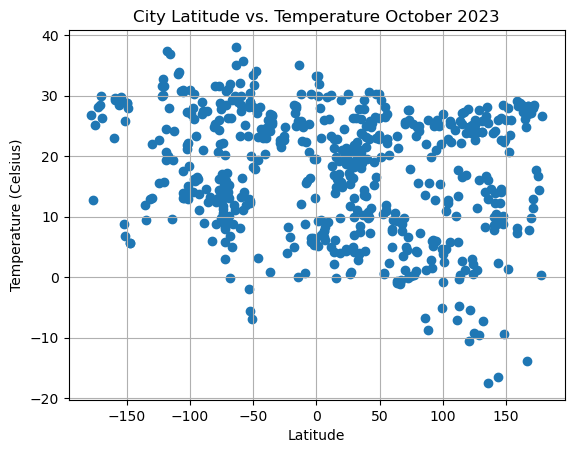

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature October 2023")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

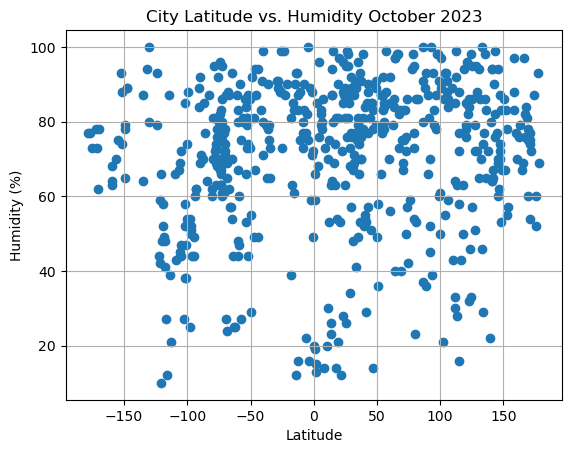

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity October 2023")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

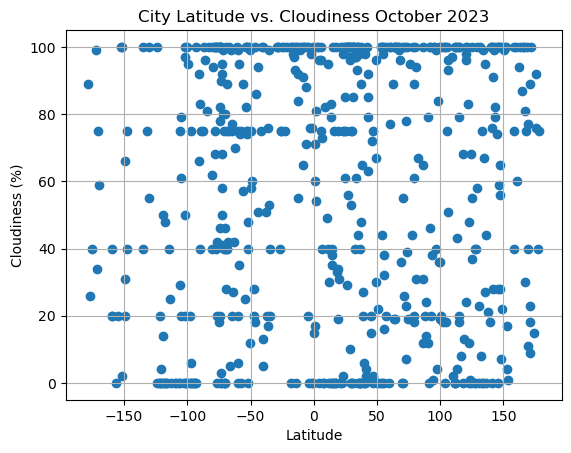

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness October 2023")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

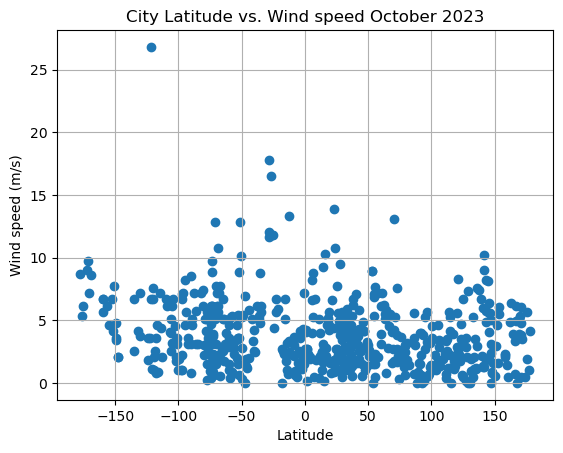

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind speed October 2023")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.04678840044116578
The equation of the line is y = -0.01x +3.93


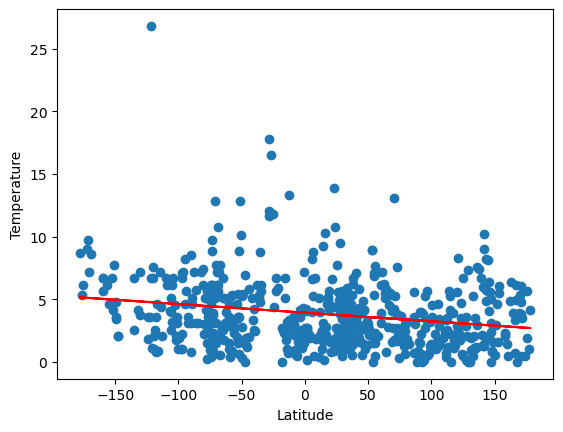

In [22]:
# Define a function to create Linear Regression plots
def regline(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    #printing equation instead of annotating so that equation is consistently visible across all regression plots
    #otherwise, plt.annotate(line_eq,(a,b),fontsize=??,color="???") can be used
    print(f'The equation of the line is {line_eq}')
    plt.show()
    
#testing newly defined function:
plt.xlabel('Latitude')
plt.ylabel('Temperature')
regline(city_data_df["Lat"],city_data_df["Wind Speed"]) 


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df["Lat"]>=0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,128.8694,71.6872,-9.60,88,100,7.37,RU,2023-10-15 17:29:15
2,blackmans bay,147.3167,-43.0167,8.74,72,56,5.04,AU,2023-10-15 17:35:39
3,gadzhiyevo,33.3362,69.2551,3.90,89,97,5.92,RU,2023-10-15 17:31:12
4,hauterive,3.4459,46.0901,9.42,68,100,2.01,FR,2023-10-15 17:35:40
7,bilibino,166.4372,68.0546,-13.91,97,100,0.71,RU,2023-10-15 17:35:42


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tomatlan,-105.2500,19.9333,30.95,72,79,3.15,MX,2023-10-15 17:35:39
5,whitehorse,-135.0538,60.7161,9.43,64,40,6.71,CA,2023-10-15 17:31:26
6,bethel,-73.4140,41.3712,14.47,66,100,3.09,US,2023-10-15 17:35:41
8,olonkinbyen,-8.7187,70.9221,0.73,73,91,3.68,SJ,2023-10-15 17:35:42
9,arraial do cabo,-42.0278,-22.9661,22.98,83,75,5.14,BR,2023-10-15 17:31:06


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.0004254166399558099
The equation of the line is y = -0.0x +15.62


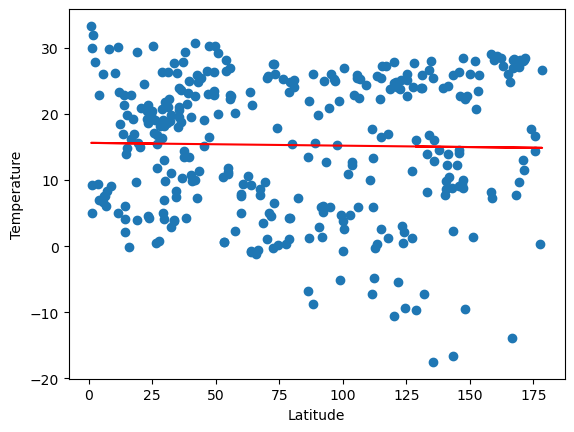

In [27]:
# Linear regression on Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Temperature')

regline(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.017207718160551735
The equation of the line is y = -0.03x +17.89


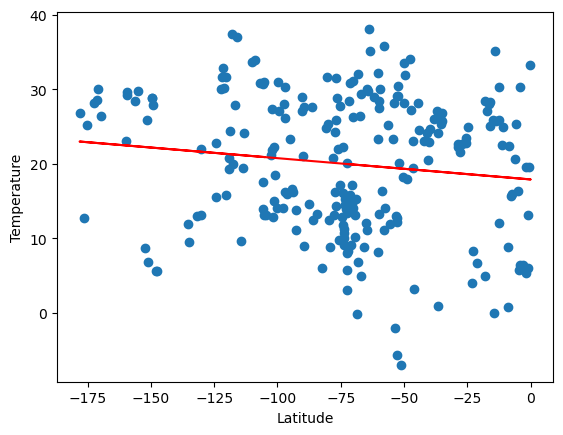

In [28]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Temperature')
regline(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** Based on the regression analysis for the two graphs above, it does not seem that there was a correlation between latitude and the maximum temperature on October 15th (when the random data was pulled).This is the case for both the Northern and Southern Hemisphere as the r values for both graphs are very close to 0. A very weak negative relationship is seen in the temperature and latitude for the Southern Hemisphere and in the Northern Hemisphere, it does not seem that any prediction of temperature can be made based on Latitude.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0070128648769047204
The equation of the line is y = 0.03x +69.75


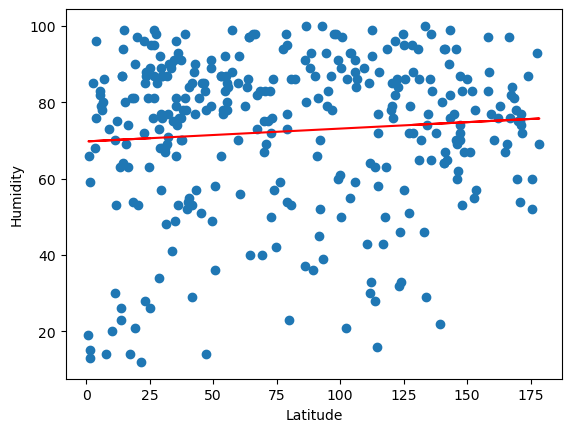

In [29]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
regline(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: 0.016303681264036547
The equation of the line is y = 0.06x +73.06


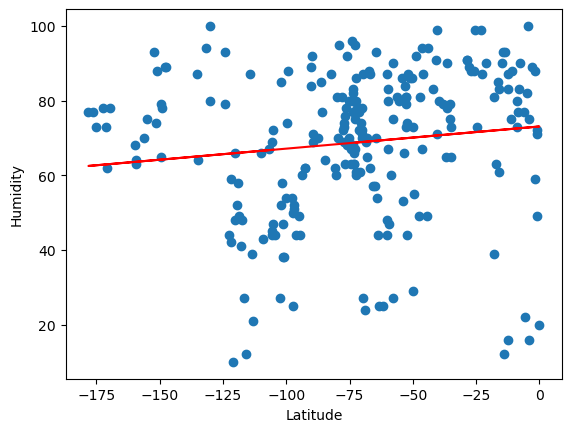

In [30]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
regline(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a very weak, positive relationship between latitude and Humidity. The r values for both the northern and southern hemisphere plots are less than 0.1, so there is no confidence around predicting humidity based on latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0002958874114673835
The equation of the line is y = 0.01x +54.88


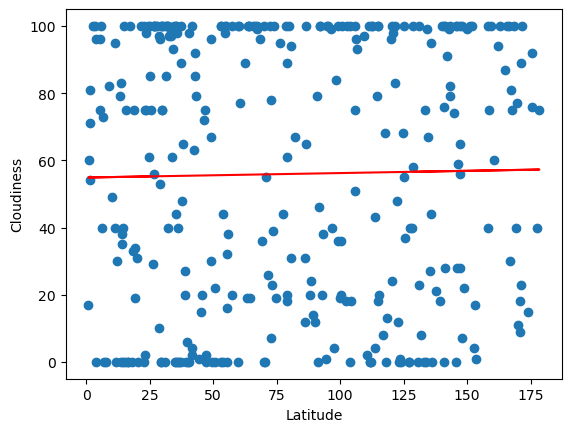

In [31]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
regline(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: 0.0778109503096266
The equation of the line is y = 0.25x +74.14


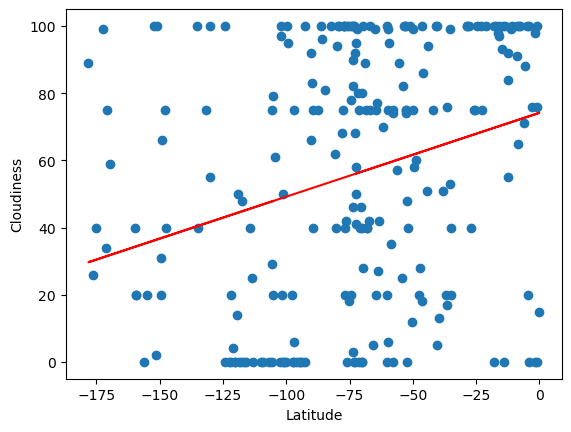

In [32]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
regline(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Without any statistical analysis, by looking at the plots itself, you can see that the data points are scattered randomly on the graph. With the regression data for both the Northern and Southern Hemisphers, we see that statisitially there is no correlation between latitude and cloudiness. Latitidue cannot be used to predict the Cloudiness levels of a city in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007873326506362128
The equation of the line is y = -0.0x +3.68


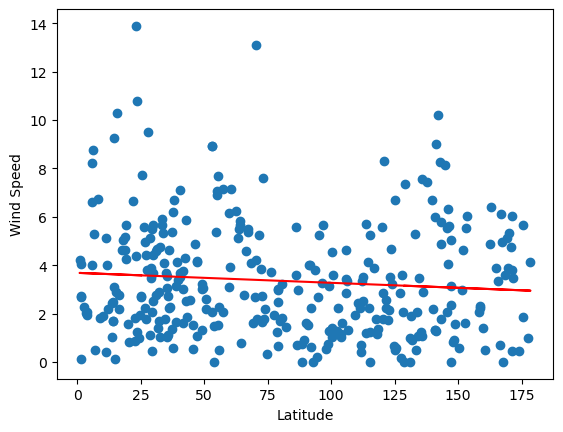

In [33]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
regline(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: 0.014381679478860038
The equation of the line is y = -0.01x +3.79


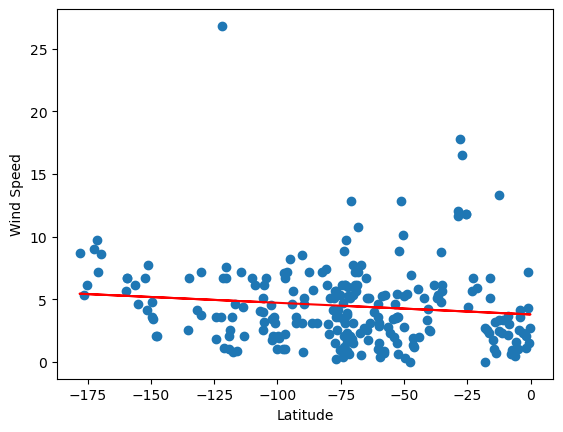

In [34]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
regline(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is a very weak, positive relationship between latitude and Humidity. The data may prove to show a stronger correlation if the outliers (based on box plot calculations, for example) are removed from each data set. It seems that there are some wind speeds that are extremely high despite location whereas the rest of the data seems to follow a downward trend based on latitude. 